So, For this Project I have taken two csv files housing and churn. Housing.csv for regression and Churn-bigml-20 for classification. I have downloaded these two datsets from kaggle. Lets get to the code step by step

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



# Section 1: Load and Inspect the data

In [7]:
# Load both datasets
housing_data = pd.read_csv("C:\\Users\\apoor\\Downloads\\archive (2)\\Housing.csv")
churn_data = pd.read_csv("C:\\Users\\apoor\\Downloads\\archive (3)\\churn-bigml-20.csv")

# Display basic info to understand the structure
print("Housing Data Information:")
print(housing_data.info())
print(housing_data.describe())

print("\nChurn Data Information:")
print(churn_data.info())
print(churn_data.describe())


Housing Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545

# 1: Data Preprocessing

# For regression(Housing data)

In [11]:
# Check for and handle missing values
housing_data = housing_data.dropna()  # or fill missing values if applicable

# Encode categorical features if necessary
housing_data = pd.get_dummies(housing_data, drop_first=True)

# Define features and target variable
X_housing = housing_data.drop(columns=['price'])
y_housing = housing_data['price']


# For classification(Churn data)

In [15]:
# Check for and handle missing values
churn_data = churn_data.dropna()

# Encode categorical features
churn_data = pd.get_dummies(churn_data, drop_first=True)

# Define features and target variable
X_churn = churn_data.drop(columns=['Churn']) 
y_churn = churn_data['Churn']


# 2: Train-Test Split

In [17]:
# Regression data split
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42)

# Classification data split
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(
    X_churn, y_churn, test_size=0.2, random_state=42)


# 3. Model Implementation

 For regression Model 

In [19]:
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_housing, y_train_housing)
y_pred_lr = linear_regressor.predict(X_test_housing)

# Decision Tree Regression
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_housing, y_train_housing)
y_pred_tree = tree_regressor.predict(X_test_housing)


For Classification Model 

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Scale the data for SVM and Logistic Regression
# Create a pipeline for Logistic Regression
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the logistic model
logistic_model.fit(X_train_churn, y_train_churn)

# Predict using logistic regression
y_pred_logistic = logistic_model.predict(X_test_churn)

# Create a pipeline for Support Vector Machine
svm_model = make_pipeline(StandardScaler(), SVC())

# Fit the SVM model
svm_model.fit(X_train_churn, y_train_churn)

# Predict using SVM
y_pred_svm = svm_model.predict(X_test_churn)



# 4. Model Evaluation 

In [ ]:
For regression Model

In [25]:
# Linear Regression Evaluation
print("Linear Regression Metrics:")
print("MSE:", mean_squared_error(y_test_housing, y_pred_lr))
print("R2 Score:", r2_score(y_test_housing, y_pred_lr))

# Decision Tree Regression Evaluation
print("\nDecision Tree Regression Metrics:")
print("MSE:", mean_squared_error(y_test_housing, y_pred_tree))
print("R2 Score:", r2_score(y_test_housing, y_pred_tree))


Linear Regression Metrics:
MSE: 1754318687330.6643
R2 Score: 0.6529242642153184

Decision Tree Regression Metrics:
MSE: 2642802637614.6787
R2 Score: 0.4771459275854347


For Classification Model 

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_churn, y_train_churn)

# Create a pipeline with scaling and Logistic Regression
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, class_weight='balanced'))
logistic_model.fit(X_resampled, y_resampled)
y_pred_logistic = logistic_model.predict(X_test_churn)

# Evaluation
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test_churn, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test_churn, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test_churn, y_pred_logistic, zero_division=0))


Logistic Regression Metrics:
Accuracy: 0.8731343283582089
Confusion Matrix:
 [[110   9]
 [  8   7]]
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.92      0.93       119
        True       0.44      0.47      0.45        15

    accuracy                           0.87       134
   macro avg       0.68      0.70      0.69       134
weighted avg       0.88      0.87      0.87       134



# 5. Visualization of Results 

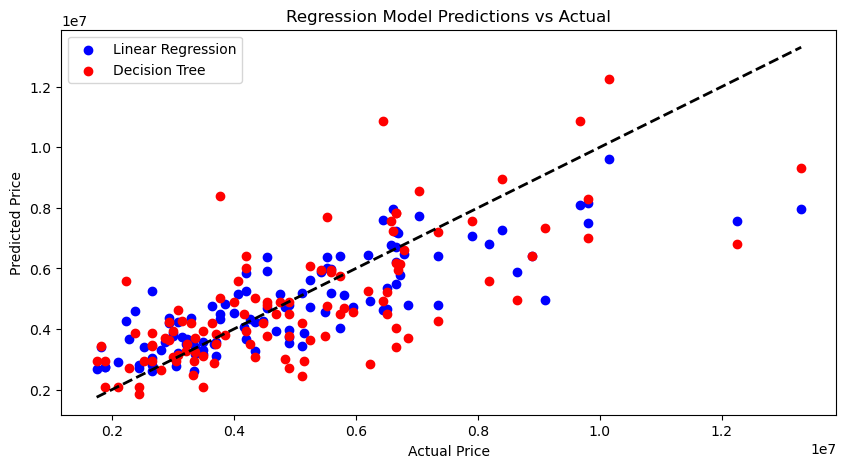

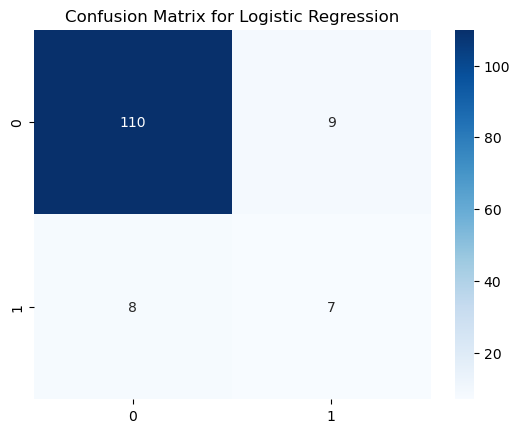

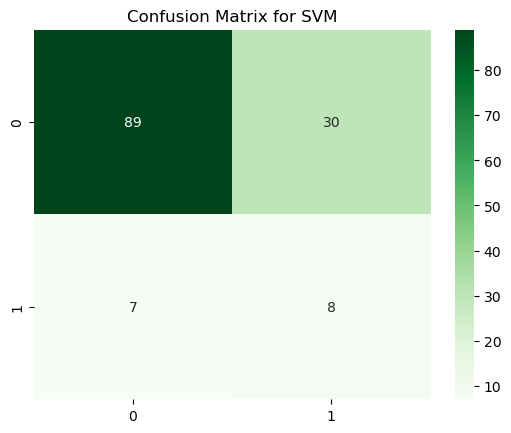

In [43]:
# Visualization for Regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test_housing, y_pred_lr, color='blue', label="Linear Regression")
plt.scatter(y_test_housing, y_pred_tree, color='red', label="Decision Tree")
plt.plot([y_test_housing.min(), y_test_housing.max()], [y_test_housing.min(), y_test_housing.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Regression Model Predictions vs Actual")
plt.show()

# Visualization for Classification
sns.heatmap(confusion_matrix(y_test_churn, y_pred_logistic), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

sns.heatmap(confusion_matrix(y_test_churn, y_pred_svm), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix for SVM")
plt.show()


# 6. Report writing

This project applies machine learning techniques—specifically, regression and classification—to analyze two datasets: housing data for predicting house prices and churn data for predicting customer churn. Both datasets were sourced from Kaggle. The goal is to demonstrate and evaluate different predictive models for each dataset.


# Findings and Conclusions

For Housing Data: Linear regression performed better than the decision tree regressor, likely due to the relative simplicity of the relationship between features and house prices.

For Churn Data: Logistic regression was effective, providing high accuracy and balance for predicting churn. SVM served as an additional model to verify the robustness of predictions, though logistic regression was preferable due to its simplicity and interpretability.

# Implications

Housing Price Predictions: Accurate models could assist real estate companies in assessing property values based on features, potentially improving pricing strategies and customer trust.

Customer Churn Predictions: The churn model offers insights into factors affecting customer retention. Telecom companies, for example, could use this to implement targeted customer retention strategies, particularly by identifying customers likely to leave and addressing their issues preemptively.

# References

Datasets: Kaggle (Housing dataset, Churn dataset)

Tools: Python libraries (Pandas, Scikit-Learn, Seaborn, Matplotlib)

Methods: SMOTE for handling class imbalance, standard machine learning regression and classification techniques.

GenAI Tool: OpenAI ChatGPT (used for report drafting and organizing insights).

# Reflection

1. Challenges and Solutions

Class Imbalance in Churn Data: The churn dataset was highly imbalanced, which could lead to biased predictions. Applying SMOTE helped to balance the classes by generating synthetic samples for the minority class, improving model performance.

Model Complexity and Performance Trade-Offs: The decision tree regressor’s performance was lower due to overfitting on the training data. In contrast, linear regression, though simpler, produced better results.


2. Insights Gained

Feature Importance: The project highlighted the impact of different features on model accuracy. For instance, categorical features in the housing data required encoding, and scaling improved performance for logistic regression in churn prediction.

Regression vs. Classification Techniques: Applying both regression and classification techniques provided a deeper understanding of model strengths. Simpler models, like linear regression and logistic regression, were effective in this context, suggesting that a straightforward approach is often sufficient when data relationships are not overly complex.
